In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from time import time
from shutil import copyfile
import zipfile
import os
import random
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [3]:
CAMVID_CLASSES = {
    'Animal': (64, 128, 64),
    'Archway': (192, 0, 128),
    'Bicyclist': (0, 128, 192),
    'Bridge': (0, 128, 64),
    'Building': (128, 0, 0),
    'Car': (64, 0, 128),
    'CartLuggagePram': (64, 0, 192),
    'Child': (192, 128, 64),
    'Column_Pole': (192, 192, 128),
    'Fence': (64, 64, 128),
    'LaneMkgsDriv': (128, 0, 192),
    'LaneMkgsNonDriv': (192, 0, 64),
    'Misc_Text': (128, 128, 64),
    'MotorcycleScooter': (192, 0, 192),
    'OtherMoving': (128, 64, 64),
    'ParkingBlock': (64, 192, 128),
    'Pedestrian': (64, 64, 0),
    'Road': (128, 64, 128),
    'RoadShoulder': (128, 128, 192),
    'Sidewalk': (0, 0, 192),
    'SignSymbol': (192, 128, 128),
    'Sky': (128, 128, 128),
    'SUVPickupTruck': (64, 128, 192),
    'TrafficCone': (0, 0, 64),
    'TrafficLight': (0, 64, 64),
    'Train': (192, 64, 128),
    'Tree': (128, 128, 0),
    'Truck_Bus': (192, 128, 192),
    'Tunnel': (64, 0, 64),
    'VegetationMisc': (192, 192, 0),
    'Void': (0, 0, 0),
    'Wall': (64, 192, 0)
}
CAMVID_CLASSES_GROUPED = {
    'Sky': ['Sky'],
    'Building': ['Archway', 'Bridge', 'Building', 'Tunnel', 'Wall'],
    'Pole': ['Column_Pole', 'TrafficCone'],  # Usando 'Pole' invece di 'Column_Pole'
    'Road': ['Road', 'LaneMkgsDriv', 'LaneMkgsNonDriv'],
    'Sidewalk': ['Sidewalk', 'ParkingBlock', 'RoadShoulder'],
    'Tree': ['Tree', 'VegetationMisc'],
    'Sign': ['TrafficLight', 'Misc_Text', 'SignSymbol'],  # Usando 'Sign' invece di 'TrafficLight'
    'Fence': ['Fence'],
    'Car': ['Car', 'OtherMoving', 'SUVPickupTruck', 'Train', 'Truck_Bus'],
    'Pedestrian': ['Animal', 'CartLuggagePram', 'Child', 'Pedestrian'],
    'Bicyclist': ['Bicyclist', 'MotorcycleScooter'],
    'Void': ['Void']  # Aggiungi la classe Void

}

GROUPED_CLASS_COLORS = {
    'Sky': (128, 128, 128),
    'Building': (128, 0, 0),
    'Pole': (192, 192, 128),
    'Road': (128, 64, 128),
    'Sidewalk': (0, 0, 192),
    'Tree': (128, 128, 0),
    'Sign': (192, 128, 128),
    'Fence': (64, 64, 128),
    'Car': (64, 0, 128),
    'Pedestrian': (64, 64, 0),
    'Bicyclist': (0, 128, 192),
    'Void': (0,0,0)
}

In [4]:
t0 = time()
# Transfer zip dataset to the current virtual machine
copyfile('/content/drive/MyDrive/semantic-segmentation-camvid/Data/raw.zip', 'raw.zip')
# Extract files
zipp = zipfile.ZipFile('raw.zip')

data_raw_path = '/content/data/'

zipp.extractall(data_raw_path)
zipp.close()
print("File transfer completed in %0.3f seconds" % (time() - t0))

File transfer completed in 31.436 seconds


In [5]:
# Percorsi delle cartelle
image_dir = '/content/data/raw/images'
label_dir = '/content/data/raw/labels'

# Ottieni tutti i percorsi delle immagini e delle maschere
image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir)]
label_paths = [os.path.join(label_dir, filename) for filename in os.listdir(label_dir)]

image_paths.sort()
label_paths.sort()

In [6]:
# Seleziona casualmente 5 immagini e le corrispondenti maschere
selected_indices = random.sample(range(len(image_paths)), 5)
selected_image_paths = [image_paths[i] for i in selected_indices]
selected_label_paths = [label_paths[i] for i in selected_indices]

# Carica le immagini selezionate e le maschere
images_sample = [img_to_array(load_img(path)) for path in selected_image_paths]
labels_sample = [img_to_array(load_img(path)) for path in selected_label_paths]

In [7]:
# Funzione per visualizzare le immagini e le maschere
def plot_images_and_masks(images, masks):
    fig, axes = plt.subplots(nrows=len(images), ncols=2, figsize=(14, len(images) * 4))

    for i in range(len(images)):
        plt.subplot(5, 2, 2*i+1)
        plt.imshow(np.uint8(images[i]))
        plt.title('Image')
        plt.axis('off')

        plt.subplot(5, 2, 2*i+2)
        mask_img = np.uint8(masks[i])
        # Crea una mappa di colori personalizzata basata sui colori delle classi
        cmap = plt.cm.colors.ListedColormap([CAMVID_CLASSES[name] for name in sorted(CAMVID_CLASSES)])
        plt.imshow(mask_img / 255.0, cmap=cmap)
        plt.title('Mask')
        plt.axis('off')

    # Mostra la legenda
    patches = [plt.matplotlib.patches.Patch(color=np.array(color)/255, label=name) for name, color in CAMVID_CLASSES.items()]
    fig.legend(handles=patches, loc = 'center left', bbox_to_anchor=(1.1, 0.5), title = "legend")
    plt.tight_layout()
    plt.show()

# Esegui la funzione di visualizzazione
plot_images_and_masks(images_sample, labels_sample)

Output hidden; open in https://colab.research.google.com to view.

In [8]:
labels = [img_to_array(load_img(path)) for path in label_paths]
import numpy as np

# Inizializza il conteggio delle classi
rgb_to_class = {v: k for k, v in CAMVID_CLASSES.items()}
class_counts = {k: 0 for k in CAMVID_CLASSES.keys()}
total_pixels = 0  # Inizializza il conteggio totale dei pixel

# Creazione di una mappa per contare più efficientemente
color_map = np.zeros((256, 256, 256), dtype=np.int32)

# Aggiorna la color_map con i conteggi dei colori nelle maschere
for mask in labels:
    mask_int = mask.astype(int)  # Converti i valori delle maschere in interi
    np.add.at(color_map, tuple(mask_int.reshape(-1, 3).T), 1)

# Convertire color_map in conteggi utili
for rgb, class_name in rgb_to_class.items():
    class_counts[class_name] = color_map[rgb]

total_pixels = sum(class_counts.values())

# Calcola la frequenza relativa come percentuale
class_frequencies = {k: v / total_pixels * 100 for k, v in class_counts.items()}

print("Class Counts:", class_counts)
print("Class Frequencies:", class_frequencies)
print("Total Pixels:", total_pixels)



Class Counts: {'Animal': 23564, 'Archway': 310760, 'Bicyclist': 2542545, 'Bridge': 218198, 'Building': 110302864, 'Car': 16496593, 'CartLuggagePram': 145928, 'Child': 136206, 'Column_Pole': 4782984, 'Fence': 6921061, 'LaneMkgsDriv': 8242265, 'LaneMkgsNonDriv': 66667, 'Misc_Text': 2844411, 'MotorcycleScooter': 48677, 'OtherMoving': 1933487, 'ParkingBlock': 1620521, 'Pedestrian': 3097211, 'Road': 132226796, 'RoadShoulder': 1236703, 'Sidewalk': 30757190, 'SignSymbol': 574244, 'Sky': 76801167, 'SUVPickupTruck': 3401178, 'TrafficCone': 15758, 'TrafficLight': 1805592, 'Train': 0, 'Tree': 50564119, 'Truck_Bus': 2605699, 'Tunnel': 4, 'VegetationMisc': 3694554, 'Void': 14572187, 'Wall': 6541892}
Class Frequencies: {'Animal': 0.004863259272200372, 'Archway': 0.0641362439071884, 'Bicyclist': 0.524743487788011, 'Bridge': 0.04503282323355867, 'Building': 22.764871248440695, 'Car': 3.404651539083591, 'CartLuggagePram': 0.03011736967720488, 'Child': 0.028110893414926317, 'Column_Pole': 0.987136788609

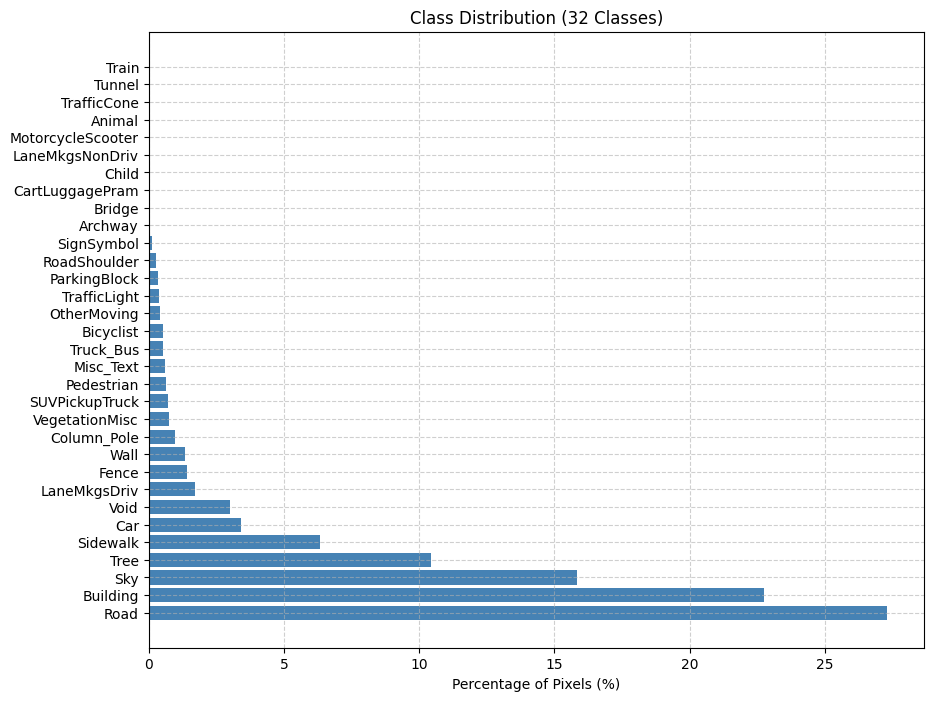

In [9]:
classes = list(class_frequencies.keys())
frequencies = [class_frequencies[cls] for cls in classes]
classes_sorted = [x for _, x in sorted(zip(frequencies, classes), reverse=True)]
frequencies_sorted = sorted(frequencies, reverse=True)

# Crea il grafico a barre
plt.figure(figsize=(10, 8))
plt.barh(classes_sorted, frequencies_sorted, color='steelblue')
plt.xlabel('Percentage of Pixels (%)')
plt.title('Class Distribution (32 Classes)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [10]:
class_frequencies_12_classes = {grouped_class: 0 for grouped_class in CAMVID_CLASSES_GROUPED.keys()}

for grouped_class, original_classes in CAMVID_CLASSES_GROUPED.items():
    for original_class in original_classes:
        class_frequencies_12_classes[grouped_class] += class_frequencies.get(original_class, 0)

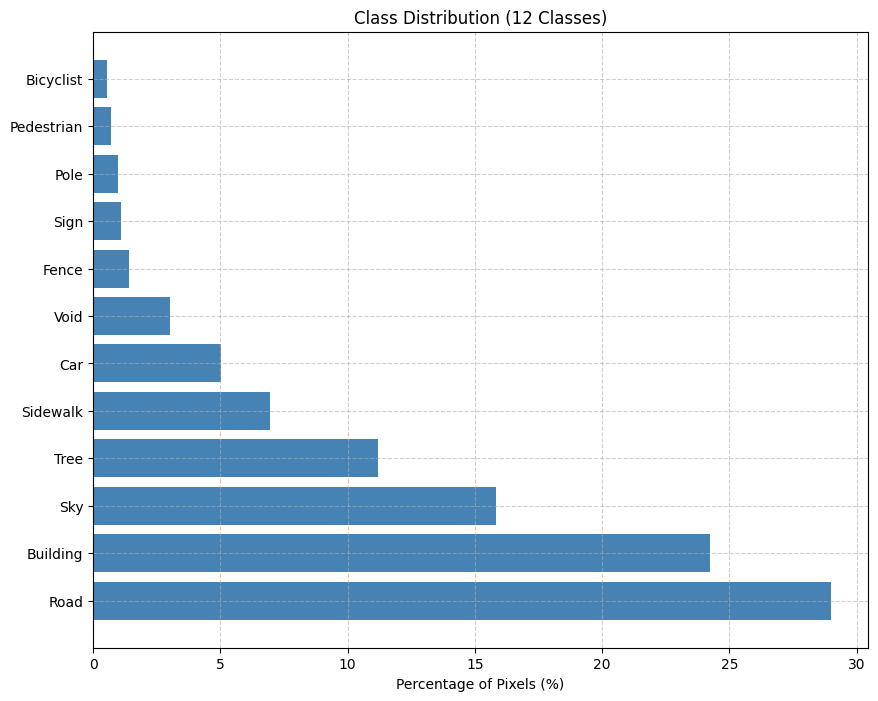

In [11]:
classes = list(class_frequencies_12_classes.keys())
frequencies = [class_frequencies_12_classes[cls] for cls in classes]
classes_sorted = [x for _, x in sorted(zip(frequencies, classes), reverse=True)]
frequencies_sorted = sorted(frequencies, reverse=True)

# Crea il grafico a barre
plt.figure(figsize=(10, 8))
plt.barh(classes_sorted, frequencies_sorted, color='steelblue')
plt.xlabel('Percentage of Pixels (%)')
plt.title('Class Distribution (12 Classes)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Processing masks: 100%|██████████| 701/701 [15:32<00:00,  1.33s/it]


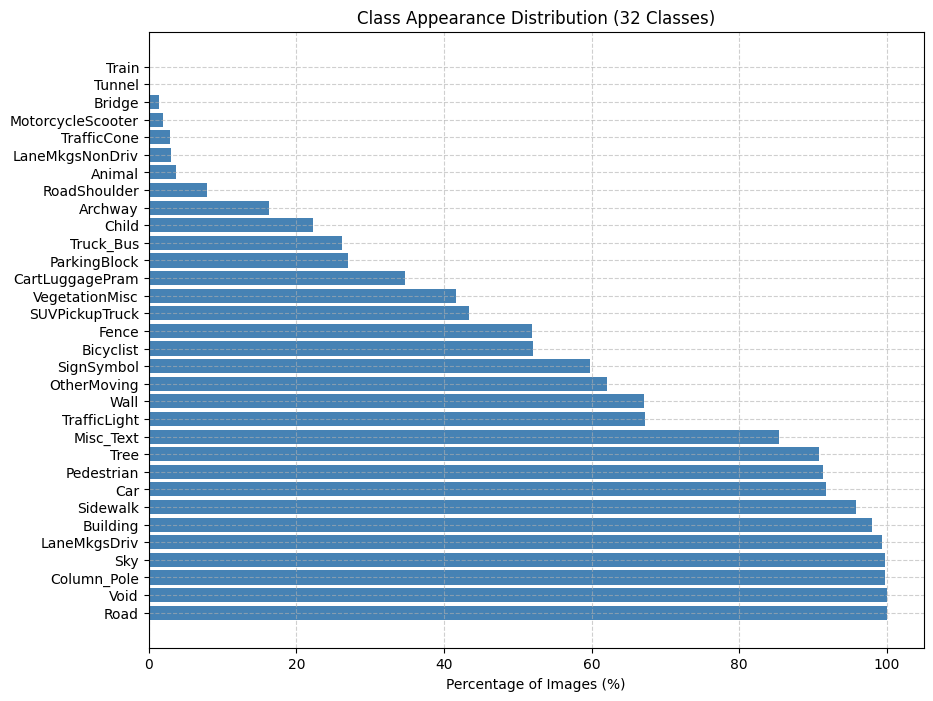

Class Appearance: {'Animal': 26, 'Archway': 114, 'Bicyclist': 365, 'Bridge': 10, 'Building': 687, 'Car': 643, 'CartLuggagePram': 243, 'Child': 156, 'Column_Pole': 699, 'Fence': 364, 'LaneMkgsDriv': 696, 'LaneMkgsNonDriv': 21, 'Misc_Text': 599, 'MotorcycleScooter': 14, 'OtherMoving': 435, 'ParkingBlock': 189, 'Pedestrian': 640, 'Road': 701, 'RoadShoulder': 55, 'Sidewalk': 672, 'SignSymbol': 419, 'Sky': 699, 'SUVPickupTruck': 304, 'TrafficCone': 20, 'TrafficLight': 471, 'Train': 0, 'Tree': 637, 'Truck_Bus': 184, 'Tunnel': 1, 'VegetationMisc': 292, 'Void': 701, 'Wall': 470}
Class Appearance Percentage: {'Animal': 3.7089871611982885, 'Archway': 16.262482168330955, 'Bicyclist': 52.06847360912982, 'Bridge': 1.4265335235378032, 'Building': 98.00285306704708, 'Car': 91.72610556348074, 'CartLuggagePram': 34.66476462196862, 'Child': 22.25392296718973, 'Column_Pole': 99.71469329529245, 'Fence': 51.925820256776035, 'LaneMkgsDriv': 99.2867332382311, 'LaneMkgsNonDriv': 2.9957203994293864, 'Misc_Text

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Inizializza il conteggio delle apparizioni delle classi
rgb_to_class = {v: k for k, v in CAMVID_CLASSES.items()}
class_appearance = {k: 0 for k in CAMVID_CLASSES.keys()}

# Creazione di una mappa per contare più efficientemente
color_map = np.zeros((256, 256, 256), dtype=np.int32)

# Aggiorna la color_map con i conteggi dei colori nelle maschere
from tqdm import tqdm
for mask in tqdm(labels, desc="Processing masks"):

    mask_int = mask.astype(int)  # Converti i valori delle maschere in interi
    # Trova i colori presenti nella maschera
    unique_colors = np.unique(mask_int.reshape(-1, 3), axis=0)
    # Incrementa solo una volta per ogni colore presente
    for color in unique_colors:
        np.add.at(color_map, tuple(color), 1)


# Convertire color_map in conteggi utili
for rgb, class_name in rgb_to_class.items():
    class_appearance[class_name] = np.sum(color_map[rgb])

total_images = len(labels)

# Calcola la frequenza relativa come percentuale
class_appearance_percentage = {k: (v / total_images) * 100 for k, v in class_appearance.items()}

# Ordina le classi per apparizione
sorted_classes = sorted(class_appearance_percentage, key=class_appearance_percentage.get, reverse=True)
sorted_percentages = [class_appearance_percentage[cls] for cls in sorted_classes]

# Plot the class appearance distribution
plt.figure(figsize=(10, 8))
plt.barh(sorted_classes, sorted_percentages, color='steelblue')
plt.xlabel('Percentage of Images (%)')
plt.title('Class Appearance Distribution (32 Classes)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Print results
print("Class Appearance:", class_appearance)
print("Class Appearance Percentage:", class_appearance_percentage)
print("Total Images:", total_images)


Processing masks: 100%|██████████| 701/701 [15:30<00:00,  1.33s/it]


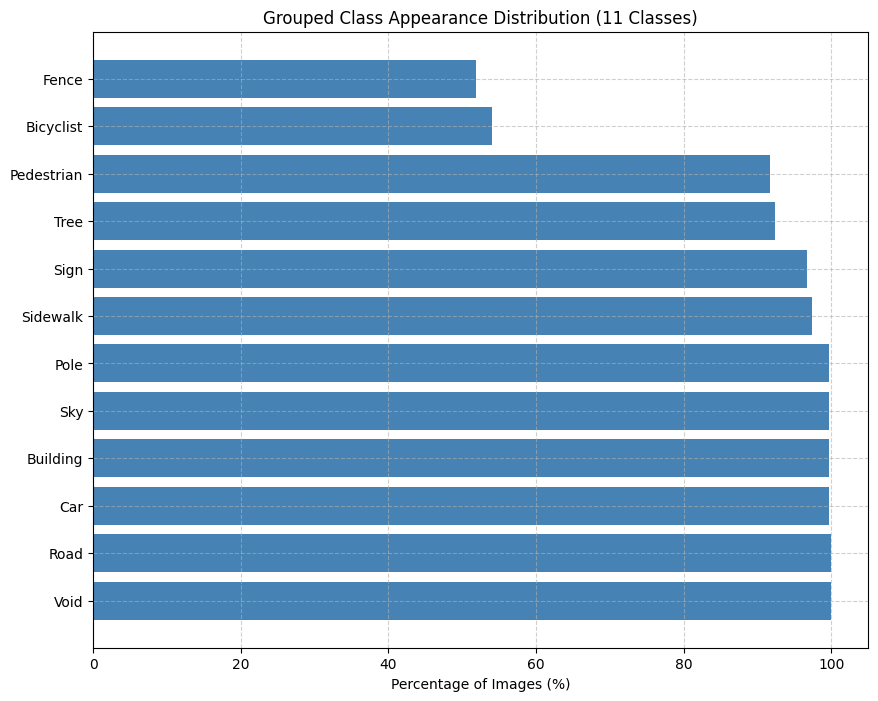

Grouped Class Appearance: defaultdict(<class 'int'>, {'Void': 701, 'Sidewalk': 683, 'Sign': 678, 'Car': 699, 'Pedestrian': 643, 'Building': 699, 'Road': 701, 'Tree': 648, 'Sky': 699, 'Pole': 699, 'Bicyclist': 379, 'Fence': 364})
Grouped Class Appearance Percentage: {'Void': 100.0, 'Sidewalk': 97.43223965763195, 'Sign': 96.71897289586305, 'Car': 99.71469329529245, 'Pedestrian': 91.72610556348074, 'Building': 99.71469329529245, 'Road': 100.0, 'Tree': 92.43937232524965, 'Sky': 99.71469329529245, 'Pole': 99.71469329529245, 'Bicyclist': 54.06562054208274, 'Fence': 51.925820256776035}
Total Images: 701


In [13]:
from collections import defaultdict


# Reverse the CAMVID_CLASSES dictionary for quick lookup
rgb_to_class = {v: k for k, v in CAMVID_CLASSES.items()}

# Create a new dictionary to store the grouped class appearance counts
grouped_class_appearance = defaultdict(int)

# Load the masks (Assuming 'labels' variable contains the masks)
from tqdm import tqdm

# Process each mask
for mask in tqdm(labels, desc="Processing masks"):
    mask_int = mask.astype(int)
    unique_colors = np.unique(mask_int.reshape(-1, 3), axis=0)

    # Create a set to track which grouped classes have been counted for this mask
    counted_groups = set()

    # Check each unique color
    for color in unique_colors:
        class_name = rgb_to_class.get(tuple(color), None)
        if class_name:
            # Find which grouped class this class_name belongs to
            for grouped_class, members in CAMVID_CLASSES_GROUPED.items():
                if class_name in members and grouped_class not in counted_groups:
                    grouped_class_appearance[grouped_class] += 1
                    counted_groups.add(grouped_class)
                    break

# Calculate the total number of masks
total_images = len(labels)

# Calculate the relative frequency as a percentage
grouped_class_appearance_percentage = {k: (v / total_images) * 100 for k, v in grouped_class_appearance.items()}

# Sort the grouped classes by appearance
sorted_grouped_classes = sorted(grouped_class_appearance_percentage, key=grouped_class_appearance_percentage.get, reverse=True)
sorted_grouped_percentages = [grouped_class_appearance_percentage[cls] for cls in sorted_grouped_classes]

# Plot the grouped class appearance distribution
plt.figure(figsize=(10, 8))
plt.barh(sorted_grouped_classes, sorted_grouped_percentages, color='steelblue')
plt.xlabel('Percentage of Images (%)')
plt.title('Grouped Class Appearance Distribution (11 Classes)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Print results
print("Grouped Class Appearance:", grouped_class_appearance)
print("Grouped Class Appearance Percentage:", grouped_class_appearance_percentage)
print("Total Images:", total_images)

In [18]:
sky_color = CAMVID_CLASSES['Sky']

def contains_sky(mask):
    """Check if the mask contains the 'Sky' class."""
    mask_int = mask.astype(int)
    return np.any(np.all(mask_int == sky_color, axis=-1))

# Filtra gli indici delle immagini che non contengono la classe 'Sky'
non_sky_indices = [i for i, path in enumerate(label_paths) if not contains_sky(img_to_array(load_img(path)))]

selected_image_paths = [image_paths[i] for i in non_sky_indices]
selected_label_paths = [label_paths[i] for i in non_sky_indices]

images_sample_no_sky = [img_to_array(load_img(path)) for path in selected_image_paths]
labels_sample_no_sky = [img_to_array(load_img(path)) for path in selected_label_paths]



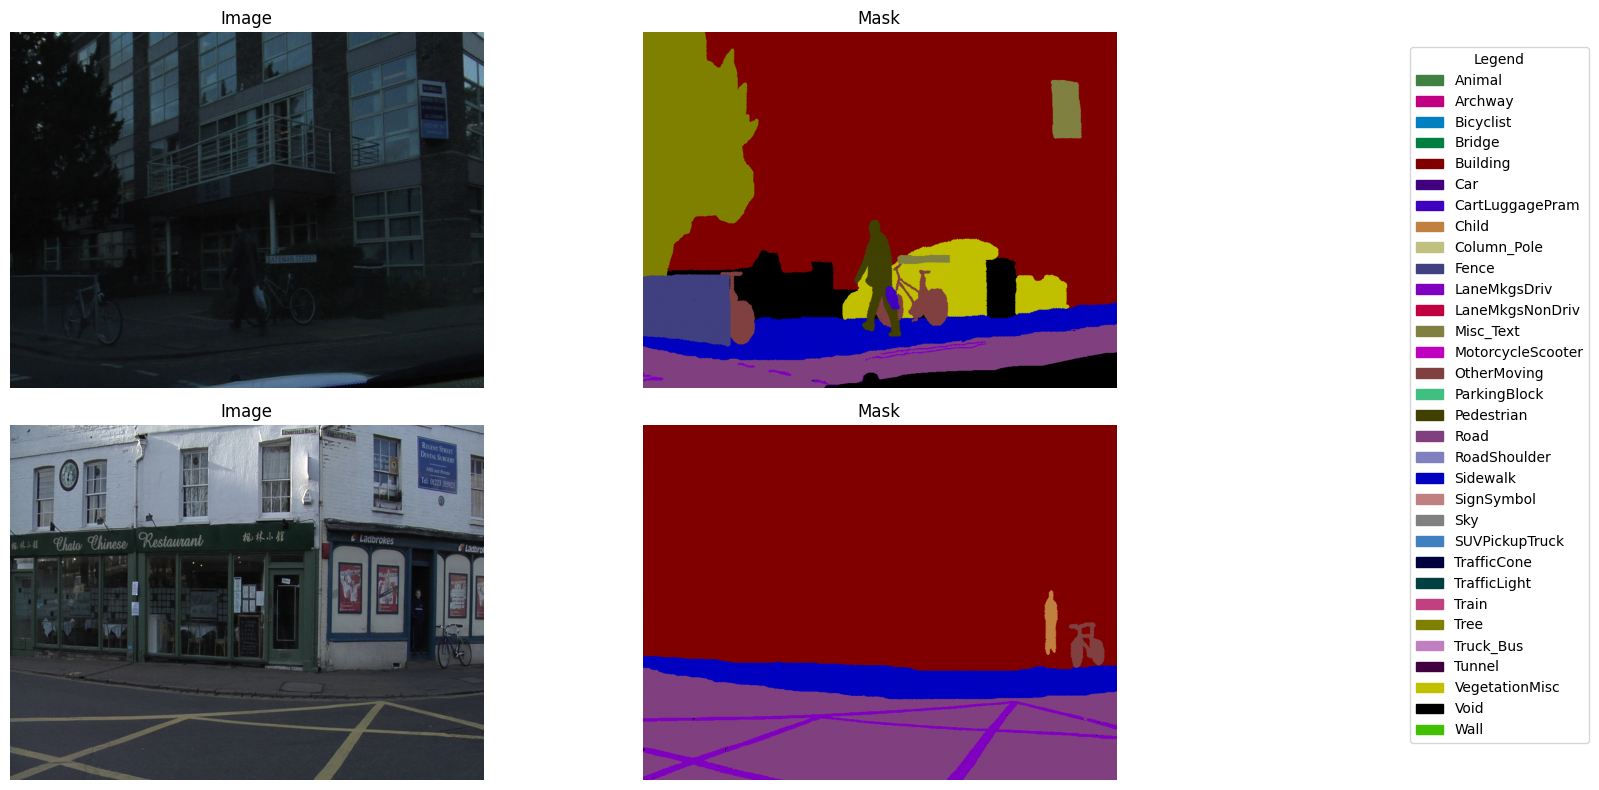

In [19]:
def plot_images_and_masks(images, masks):
    fig, axes = plt.subplots(nrows=len(images), ncols=2, figsize=(14, len(images) * 4))

    for i in range(len(images)):
        axes[i, 0].imshow(np.uint8(images[i]))
        axes[i, 0].set_title('Image')
        axes[i, 0].axis('off')

        mask_img = np.uint8(masks[i])
        # Crea una mappa di colori personalizzata basata sui colori delle classi
        cmap = plt.cm.colors.ListedColormap([np.array(CAMVID_CLASSES[name]) / 255.0 for name in sorted(CAMVID_CLASSES)])
        axes[i, 1].imshow(mask_img / 255.0, cmap=cmap)
        axes[i, 1].set_title('Mask')
        axes[i, 1].axis('off')

    # Mostra la legenda
    patches = [plt.matplotlib.patches.Patch(color=np.array(color)/255, label=name) for name, color in CAMVID_CLASSES.items()]
    fig.legend(handles=patches, loc='center left', bbox_to_anchor=(1.1, 0.5), title="Legend")
    plt.tight_layout()
    plt.show()
plot_images_and_masks(images_sample_no_sky, labels_sample_no_sky)